# Seeing Change Over Time: An Introduction to Time Series Analysis 📈

Welcome back! This notebook builds on our introduction to computational notebooks. Here, we'll dive into a specific, powerful type of analysis: **exploring data that changes over time**. This is called time series analysis.

Data that unfolds over time is everywhere: daily temperature, stock market prices, student attendance, historical events, and ecological changes. Notebooks are exceptionally well-suited for this type of analysis.

To explore some of the key ideas of time series analysis, we will explore air quality measurements.

## Key Ideas for Time Series Analysis

This notebook will introduce you to some important technical and pedagogical details about time series analysis:

* **Handling Dates and Times is Tricky:** Time is a special kind of data. A notebook, powered by a programming language, has specialized tools to understand that "March 1st" comes after "Feb 28th" (except during a leap year), and to calculate the duration between two timestamps. This is something spreadsheets struggle with.

* **Visualizing Trends is Key:** The most powerful tool for seeing patterns in time is a **line graph**. Notebooks allow us to create dynamic, detailed, and accurate line graphs directly from our data, making it easy to examine how everyday (or surprising!) events might be reflected in the data.

* **Understanding Scale and Measurement Matters**. It's not enough to simply see that a value is going up or down. It's also important to separate the "signal" from the "noise": that is, to understand whether the differences you observe are big enough and consistent enough to be meaningful. Being able to interpret what specific measurements mean in terms of their impact on human or scientific systems is just as important as being able to interpret numbers and graphs themselves.

## Loading and Graphing Air Quality Data

We will start with a quick introduction to some of the technical and conceptual foundations for time series data: showing you how to look at a dataset of hourly air quality measurements. At first, the key attribute we will focus on is the Air Quality Index or **AQI**, a measure used by many health and government organizations to communicate with the public. AQI is a measure that takes into account the presence and levels of several different air pollutants at once, to give an overall assessment of whether the air is, overall, safe to breathe. 

**Our Learning Goals:**
* **Code:** Learn how to combine columns to create a `datetime` object, work with `datetime` objects, and how to create a line plot to visualize data over time.
* **Statistics/Data:** Learn how to visualize data over time using line graphs to identify trends, cycles, and unusual events (outliers). Learn to exercise caution in interpreting patterns in data by using what you know about measurement to separate "signal" from "noise." 
* **Content:** Uncover and explore real-world patterns in air pollution data. 

We're going to load a dataset that reports the hourly AQI over the course of one week from a monitoring station in West Oakland. The data are from the Bay Area Air Quality Municipal District, an air pollution control agency that monitors and reports on air quality in the greater San Francisco Bay region.

In [31]:
import pandas as pd # pandas is for making data tables

aqi_data = pd.read_csv('baaqmd_data.csv') # read the data
aqi_data.head() # show the first 5 rows of data

,Month,Day,Year,Time,AQI
0,7,2,2025,00:00,20
1,7,2,2025,01:00,20
2,7,2,2025,02:00,18
3,7,2,2025,03:00,11
4,7,2,2025,04:00,14


We will use this dataset to walk through the essential code for time series analysis. Remember, good documentation explains both the "why" (in text like this) and the "how" (in `#code comments`).

The first thing you may notice above is that the month, day, year, and hour of each AQI record is stored in a different column.

We need to convert all this separate information into a single `datetime`. A `datetime` is a special format that computers use to keep time information organized.

Let's show a quick example with one date, and then we will use the same process to convert all the records in our AQI dataset. Try replacing the code below with a date that is special to you!

In [32]:
# often, datasets express date and time separately. 
# we will practice with a single, split up date
year = 2025 # a number format
month = 9
day = 9
time = "17:53" # a string/text format

# let's split the time up into hours and minutes
hours, minutes = time.split(':')

# first, we put these together into a common date format 
consolidated = str(month) + "-" + str(day) + "-" + str(year) + " " + str(hours) + ":" + str (minutes)
consolidated # show the text string we made

'9-9-2025 17:53'

Now, we want to take the combined date and convert it to the `datetime` object.

In [33]:
# if the text string is a common format, the to_datetime
# function will automatically read and convert it to a
# datetime

pd.to_datetime(consolidated)

Timestamp('2025-09-09 17:53:00')

We are going to do this same process for all the records in the air quality dataset. In the example above, we did this for only one set of date information. Below, the code will look a bit different because we are doing the process for *all* the records in `aqi_data`.

In [35]:
# each record in the data table has a Month, Day, Year, and Time.
# Below, we split the Time up into Hours and Minutes, like we did in the example.

# Make new columns in aqi_data called "Hours" and "Minutes."
# Take what's in the "Time" column and split it up. The numbers before
# the colon become hours, the numbers after the colon become minutes.
aqi_data[['Hours', 'Minutes']] = aqi_data['Time'].str.split(':', expand=True).astype(int)

# for each record, store the values that represent year,
# month, day, etc. to be converted to a datetime
datetime_info = {
    'year': aqi_data['Year'],
    'month': aqi_data['Month'],
    'day': aqi_data['Day'],
    'hour': aqi_data['Hours'],
    'minute': aqi_data['Minutes']
}

# Add a new column called 'datetime' to aqi_datetime.
# Convert the information for each record that is saved 
# in datetime_info into a datetime and put it in the column.
aqi_data['datetime'] = pd.to_datetime(datetime_info)

# show the dataset with the new datetime column
aqi_data

,Month,Day,Year,Time,AQI,Hours,Minutes,datetime
0,7,2,2025,00:00,20,0,0,2025-07-02 00:00:00
1,7,2,2025,01:00,20,1,0,2025-07-02 01:00:00
2,7,2,2025,02:00,18,2,0,2025-07-02 02:00:00
3,7,2,2025,03:00,11,3,0,2025-07-02 03:00:00
4,7,2,2025,04:00,14,4,0,2025-07-02 04:00:00
...,...,...,...,...,...,...,...,...
163,7,8,2025,19:00,19,19,0,2025-07-08 19:00:00
164,7,8,2025,20:00,19,20,0,2025-07-08 20:00:00
165,7,8,2025,21:00,20,21,0,2025-07-08 21:00:00
166,7,8,2025,22:00,20,22,0,2025-07-08 22:00:00


### Visualizing the Data

Now that we have a proper `datetime` column, we can create a line plot. This will let us see the "shape" of the data over time. Are there patterns? Spikes? Dips?

Let's plot the PM2.5 concentration for the first few months of data to see what it looks like.

<Axes: xlabel='datetime', ylabel='AQI'>

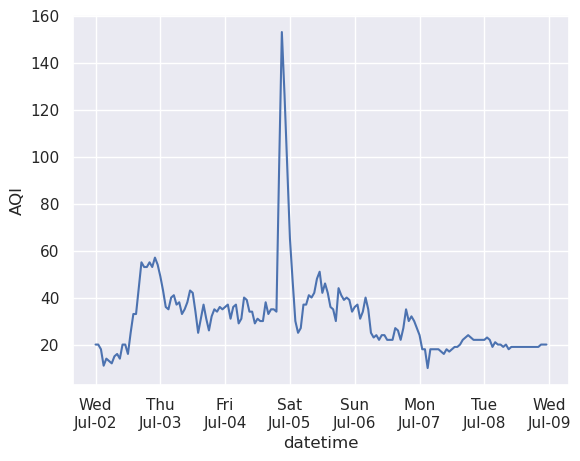

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

sns.set_theme() # this sets a nice theme with a grid on the plots

# we want to format the datetimes so they look nice on the plot
# the line below says to show the day "%a", then make a new line "\n"
# and put the MM-DD on the new line "%b-%d"
date_format = mdates.DateFormatter('%a\n%b-%d')

# the line below sends the new date format to the plot
plt.gca().xaxis.set_major_formatter(date_format)

# draw the plot
sns.lineplot(
    data=aqi_data, 
    x='datetime', 
    y='AQI'
)

What do you notice and wonder?

What could have happened to create the pattern you see above?

There are many rises and falls in the data. Often in data analysis, people talk about "signal" versus "noise". What patterns in this graph would you consider to be "signals" and what might be "noise"? How are you making those decisions?

You may have noticed that the large spike in the graph occurs in the evening of July 4. How did/does this impact your interpretation of the graph?

Summary: now you know about datetime, plotting line graphs, and exploring trends over time based on what you know about a measure. Let's apply these to a more interactive data investigation.

# Getting Clear on Air Quality: Pollutant Patterns During San Francisco's Orange Skies Day

On September 9, 2020 residents in the greater San Francisco Bay Area woke up to a sky that was a deep, saturated orange color. What was later called "Orange Skies day" was caused by air pollution generated by a combination of intense wildfires nearby, and weather conditions that suspended particulate matter high in the atmosphere for some time, creating the orange color effect.

<div style="display: flex; justify-content: space-around;">

<img src="bridge.jpg" width="250"> 

<img src="financial.jpg" width="250"> 

<img src="nature.jpg" width="250"> 

</div>

In this activity, we will look at hourly air quality measurements taken in Richmond, CA, a northern East Bay suburb of San Francisco, from the Sept 3 until Sept 17, 2020. (XXX might replace this with something closer to SF but the readings will be similar.)

## Loading the data

First, let's take a look at the dataset to see what we will be working with. Before you play the next cell, take some time to think about what attributes (columns) might be included in the dataset.

In [77]:
fire_data = pd.read_csv('sept2020.csv')

fire_data # this will show the first 5 records and the last 5 records in the dataset.

,pollutant,date_local,time_local,date_gmt,time_gmt,value,units_of_measure,datetime_local
0,Carbon monoxide,2020-09-03,00:00,2020-09-03,08:00,0.7,Parts per million,2020-09-03 00:00:00
1,Carbon monoxide,2020-09-03,01:00,2020-09-03,09:00,0.7,Parts per million,2020-09-03 01:00:00
2,Carbon monoxide,2020-09-03,02:00,2020-09-03,10:00,NaN,Parts per million,2020-09-03 02:00:00
3,Carbon monoxide,2020-09-03,03:00,2020-09-03,11:00,0.6,Parts per million,2020-09-03 03:00:00
4,Carbon monoxide,2020-09-03,04:00,2020-09-03,12:00,0.7,Parts per million,2020-09-03 04:00:00
...,...,...,...,...,...,...,...,...
1075,PM2.5,2020-09-17,19:00,2020-09-18,03:00,8.0,Micrograms/cubic meter (LC),2020-09-17 19:00:00
1076,PM2.5,2020-09-17,20:00,2020-09-18,04:00,8.0,Micrograms/cubic meter (LC),2020-09-17 20:00:00
1077,PM2.5,2020-09-17,21:00,2020-09-18,05:00,7.0,Micrograms/cubic meter (LC),2020-09-17 21:00:00
1078,PM2.5,2020-09-17,22:00,2020-09-18,06:00,5.0,Micrograms/cubic meter (LC),2020-09-17 22:00:00


QUESTIONS: What do you notice?

(goals here: 
- that they notice there is not an AQI measure. 
 - they notice the datetime, that there are different date/time/datetime columns, etc.
 - perhaps some questions about scale or how to interpret the numbers.
 Instead, there are different pollutants listed under "parameter." They might also notice things about the datetime information... there is local and gmt.

maybe a question like **what information would you need to interpret these readings**? Hopefully, from the materials above, the participant notes that they'll want to know more about the measurements and scales since they are different here and not AQI. 

Let's take a look some summary descriptions of the data to get a better sense of what we are working with. We're going to use the describe() function, which you've seen before. You'll notice that there are different measurements all stored in the same column. We can use groupby to treat them differently.

In [92]:
# show summary statistics, but do it by the different pollutant groups.
fire_data.groupby('pollutant').describe()

value                                                     \
                 count       mean    min     25%     50%     75%      max   
pollutant                                                                   
Carbon monoxide  336.0   0.973810  0.300   0.600   0.700   1.525    2.100   
Ozone            336.0   0.024304  0.002   0.015   0.023   0.030    0.081   
PM2.5            359.0  50.398329  0.000  13.000  27.000  86.000  196.000   

                           datetime                                            \
                       std    count                 mean                  min   
pollutant                                                                       
Carbon monoxide   0.500595      360  2020-09-10 11:30:00  2020-09-03 00:00:00   
Ozone             0.013777      360  2020-09-10 11:30:00  2020-09-03 00:00:00   
PM2.5            48.513145      360  2020-09-10 11:30:00  2020-09-03 00:00:00   

                                                           \
                                 25%                  50%   
pollutant                                                   
Carbon monoxide  2020-09-06 17:45:00  2020-09-10 11:30:00   
Ozone            2020-09-06 17:45:00  2020-09-10 11:30:00   
PM2.5            2020-09-06 17:45:00  2020-09-10 11:30:00   

                                                                
                                 75%                  max  std  
pollutant                                                       
Carbon monoxide  2020-09-14 05:15:00  2020-09-17 23:00:00  NaN  
Ozone            2020-09-14 05:15:00  2020-09-17 23:00:00  NaN  
PM2.5            2020-09-14 05:15:00  2020-09-17 23:00:00  NaN

### Visualizing the Data Over Time

<Axes: xlabel='datetime', ylabel='value'>

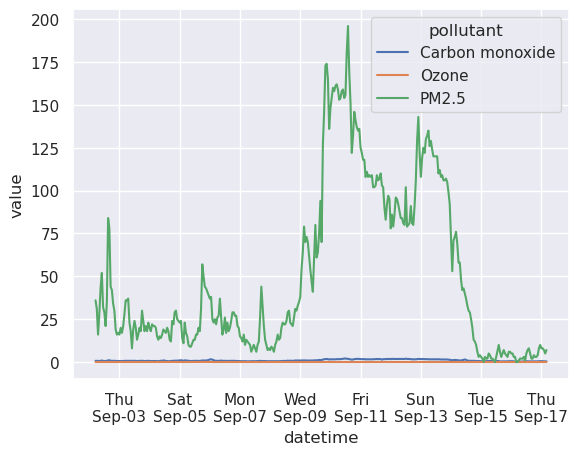

In [ ]:
#Plot the three pollutants together. you'll see that the scales are wonky and PM2.5 looks like you would expect, but it's hard to see what's happening with O3 and CO.
# since the dataset has a column that describes datetime, we can
# easily convert that to Python datetimes using to_datetime.
fire_data['datetime'] = pd.to_datetime(fire_data['datetime_local'])

## FORMATTING STUFF
# set the date format, like we did in the first example above
date_format = mdates.DateFormatter('%a\n%b-%d')  # set the format
plt.gca().xaxis.set_major_formatter(date_format) # give format to the plot

# we have lots of days, so let's only add a tick to the axis
# for every 48 hours
locator = mdates.HourLocator(interval=48)  # set the format
plt.gca().xaxis.set_major_locator(locator) # give the format to the plot

# now, create a plot showing levels of each pollutant over time
sns.lineplot(
    data=fire_data, 
    x='datetime', 
    y='value',
    hue = 'pollutant'
)

Discussion questions:

- is this what you expected? why or why not?
- What do you notice/wonder here?
- What additional information do you need to make progress in understanding how air quality changed during the "Orange Skies" incident?
- What of the data you see above would you consider to be a "signal"? What would you consider to be "noise"?

Like we mentioned above, different pollutants are measured on different scales. While we can see some trends in the plot above, we can't be sure about what is meaningful or not without understanding more about how these are measured, and what the measures mean. Here are some important things to know about the pollutants that are in this dataset, and some current EPA National Ambient Air Quality Standards for each.

PM2.5 describes very small particles, like black carbon or ash, that are in the air. PM2.5 can irritate the lungs, causing respiratory problems. These particles are so small that they can even pass through the lung barrier and get into the bloodstream, causing other health problems as well. PM2.5 concentrations are usually measured in micrograms per cubic meter (explain relatably). The U. S. EPA specifies PM2.5 values of 0-9 as "Good", 12.1-35.4 as "Moderate", 35.5-55.4 as "Unhealthy for Sensitive Groups," and values over 55.5 as Unhealthy for all groups.

Ozone is a chemical that exists as a natural part of Earth's upper atmosphere, and that is also created at the ground level when various other pollutants interact with heat and light. Ozone causes a variety of respiratory problems, especially for children and people with asthma. The EPA designates Ozone levels over 0.071 ppm as "marginal", over 0.081 ppm as "moderate", and over 0.093 as "serious" in terms of the potential for harm to public health.

Carbon monoxide is a tiny molecule that interferes with the body's ability to carry oxygen in blood. At high levels can cause acute poisoning, loss of conciousness and death. At lower levels, exposure can cause headaches, nausea, muscle pain, and cognitive impairment. The EPA has designated CO levels over 9 ppm (over 8 hours) or 35 ppm (over 1 hour) as harmful to public health.


### Visualizing Trends for Each Pollutant

Since these pollutants are measured and interpreted using very different scales, it is helpful to look at each separately. We can do this by creating a line plot that is filtered to only one pollutant at a time. The code below creates a filter, so that only PM2.5 data is used to create the line plot. 

What do you think will be trends in the graphs for the other polluntants? Edit and use the code below as a tool to explore the concentrations of PM2.5, Ozone, and Carbon Monoxide, separately to get a better sense of each pattern at an interpretable scale.

<Axes: xlabel='datetime', ylabel='value'>

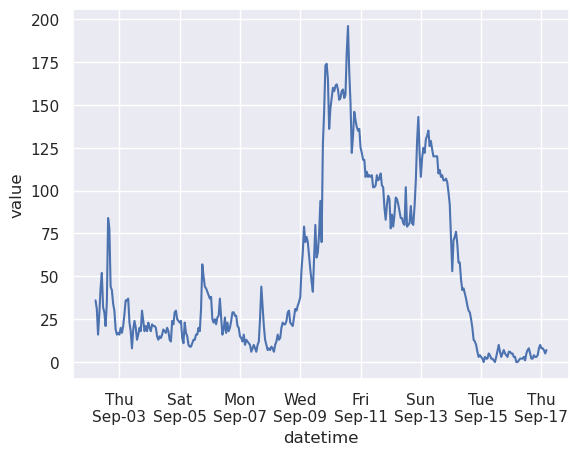

In [105]:
## FORMATTING STUFF
# set the date format, like we did in the first example above
date_format = mdates.DateFormatter('%a\n%b-%d')  # set the format
plt.gca().xaxis.set_major_formatter(date_format) # give format to the plot

# we have lots of days, so let's only add a tick to the axis
# for every 48 hours
locator = mdates.HourLocator(interval=48)  # set the format
plt.gca().xaxis.set_major_locator(locator) # give the format to the plot

## FILTER TO THE POLLUTANT
filter = fire_data['pollutant']=="PM2.5" # this filters to just PM2.5 data

sns.lineplot(data=fire_data[filter], x='datetime', y='value')

Questions - what new things did you discover when looking at the plots separately?

How did you use the information above, about each pollutant, to help you make sense of the pattenrs?

What questions do you still have?

### Looking Across Pollutants with Adjusted Scales

You may have noticed that not all of the pollutants increased as a result of the wildfires. When doing time series analyses, it is sometimes helpful to align multiple plots to see what was happening with each value at the same point in time. Below, we generate a plot with all three pollutants aligned.

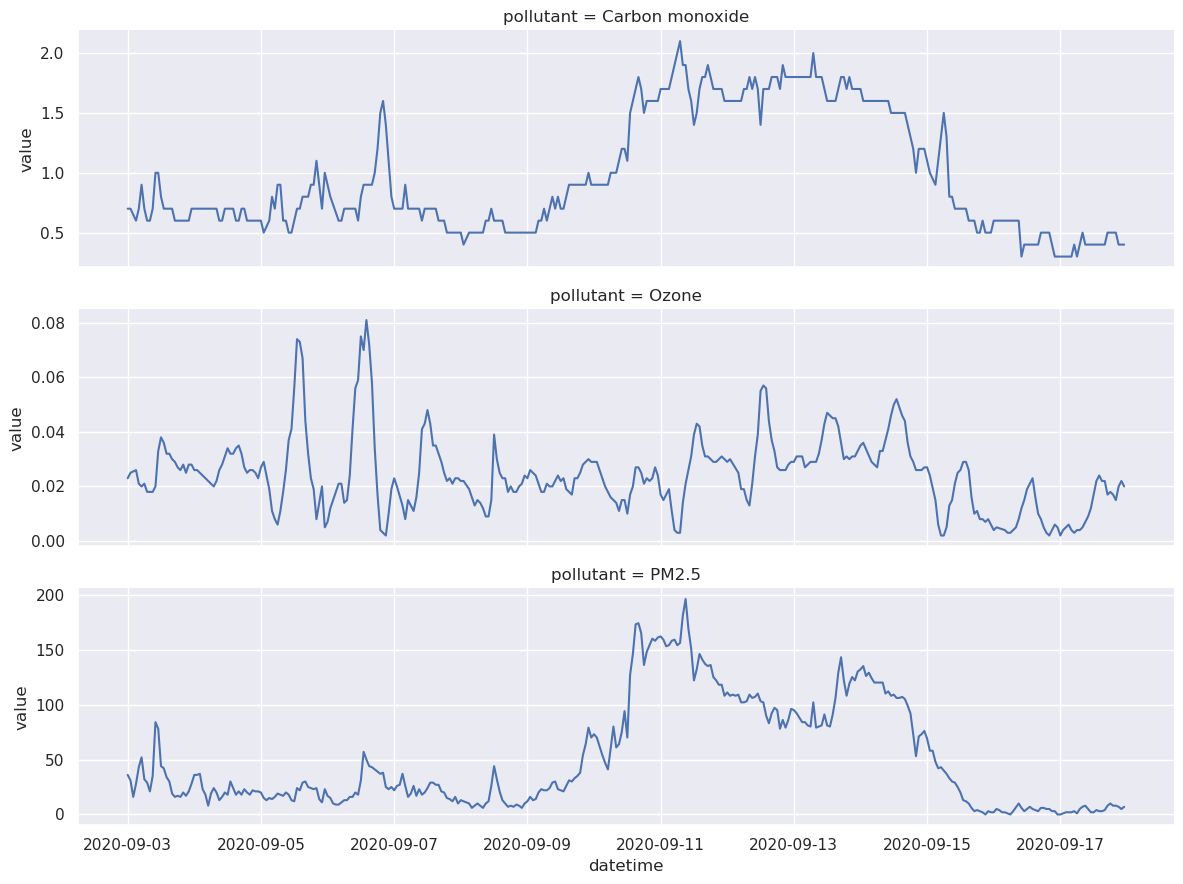

In [104]:
g = sns.FacetGrid(fire_data, 
                  row="pollutant", 
                  aspect=4, # this makes the graphs 4x wider than they are tall
                  sharey=False)

g.map(sns.lineplot, "datetime", "value")

Discussion Questions

Which patterns among the three graphs you see above are "worth talking about"? Why?

If you had to tell the story of air quality during the weeks featured above, what story would you tell?

Is anything interesting happening with Ozone? Why or why not?

There is a "dip" in PM2.5 levels between 9-11 and 9-20, but not in CO levels. Why might this be? Is it something worth paying attention to? Why or why not?

## In the Classroom

This notebook models a core scientific activity: observing, processing, and visualizing time series data to find patterns.

**How to Use This in a Lesson:**
* **Science:** In an Earth Science or Environmental Science unit, students could use this notebook to explore real-world pollution data. You could pose questions like: "Are pollution levels higher during certain times of the day? Or certain seasons?" They would modify the code to filter for different time periods to answer those questions.
* **Math:** In a statistics or data analysis unit, the focus could be on the visualization itself. Why is a line graph appropriate here? What does a sharp spike represent? What rises and falls in the concentrations are worth paying attention to, and which ones might not actually reflect a "signal" among the "noise"?

What other air quality events or patterns might be worth looking at?

# Where Else Do We See Time Series?

The skills you just practiced—creating datetime objects and plotting line graphs—are foundational for analyzing any data that has a time component.

Think about how you could apply this same "bundle" of skills to other content areas:

* **Ecology:** Tracking the population of a predator and its prey over several decades to see their cyclical relationship.
* **Social Studies / History:** Plotting immigration rates, economic indicators (like GDP), or census data over time to analyze historical trends.
* **Finance:** Analyzing the stock price of a company over a year to identify volatility and trends.
* **School Improvement:** Plotting daily student attendance rates over a school year to identify days or weeks with low attendance that might need intervention.

Any time you have a question that includes the words "over time," the tools and concepts in this notebook are a great place to start your investigation.

Credit

North Complex smoke in San Francisco - Bay Bridge and Financial District.jpg  North Complex smoke in San Francisco - Financial District.jpg by Christopher Michel / Wikipedia / CC-BY-2.0

Observing the Orange Sky in San Francisco, California, USA, September 9, 2020.jpg by Semiautonomous / Wikipedia / CC-BY-SA-4.0